In [44]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
# import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt

In [46]:
# import machine learning models and packages
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [47]:
# columns= []

In [48]:
# load the appended final .csv
#file_path = Path('Resources/Top_6_Most_Polluted_US_States.csv')

In [87]:
# load the appended final .csv
top_pollution = pd.read_csv('Resources/Top_6_Most_Polluted_US_States.csv')

In [88]:
# Get column names
top_pollution.columns.to_list()

['Unnamed: 0',
 'CBSA',
 'CBSA Code',
 'Year',
 'Days with AQI',
 'Good Days',
 'Moderate Days',
 'Unhealthy for Sensitive Groups Days',
 'Unhealthy Days',
 'Very Unhealthy Days',
 'Hazardous Days',
 'Max AQI',
 '90th Percentile AQI',
 'Median AQI',
 'Days CO',
 'Days NO2',
 'Days Ozone',
 'Days PM2.5',
 'Days PM10',
 'City',
 'State']

In [89]:
#column data types
top_pollution.dtypes

Unnamed: 0                              int64
CBSA                                   object
CBSA Code                               int64
Year                                    int64
Days with AQI                           int64
Good Days                               int64
Moderate Days                           int64
Unhealthy for Sensitive Groups Days     int64
Unhealthy Days                          int64
Very Unhealthy Days                     int64
Hazardous Days                          int64
Max AQI                                 int64
90th Percentile AQI                     int64
Median AQI                              int64
Days CO                                 int64
Days NO2                                int64
Days Ozone                              int64
Days PM2.5                              int64
Days PM10                               int64
City                                   object
State                                  object
dtype: object

In [91]:
# rename columns
renamed_data = top_pollution.rename(columns={'CBSA Code': 'cbsa_code', 'Days with AQI': 'days_with_AQI', 'Good Days': 'good_days', 'Moderate Days': 'moderate_days','Unhealthy for Sensitive Groups Days': 'unhealthy_sensitive_days', 'Unhealthy Days': 'unhealthy_days','Very Unhealthy Days': 'very_unhealthy_days','Hazardous Days': 'hazardous_days','Max AQI': 'max_AQI','90th Percentile AQI': '90th_percentile_AQI','Median AQI': 'median_AQI','Days CO': 'days_CO','Days NO2': 'days_NO2','Days Ozone': 'days_ozone','Days PM2.5': 'days_PM2.5','Days_PM10': 'days_PM10'})
renamed_data.columns.to_list()

['Unnamed: 0',
 'CBSA',
 'cbsa_code',
 'Year',
 'days_with_AQI',
 'good_days',
 'moderate_days',
 'unhealthy_sensitive_days',
 'unhealthy_days',
 'very_unhealthy_days',
 'hazardous_days',
 'max_AQI',
 '90th_percentile_AQI',
 'median_AQI',
 'days_CO',
 'days_NO2',
 'days_ozone',
 'days_PM2.5',
 'Days PM10',
 'City',
 'State']

In [127]:
renamed_data.head(10)

,Unnamed: 0,CBSA,cbsa_code,Year,days_with_AQI,good_days,moderate_days,unhealthy_sensitive_days,unhealthy_days,very_unhealthy_days,...,max_AQI,90th_percentile_AQI,median_AQI,days_CO,days_NO2,days_ozone,days_PM2.5,Days PM10,City,State
0,30,"Bakersfield, CA",12540,2012,366,64,160,92,49,1,...,202,154,84,0,0,218,143,5,Bakersfield,CA
1,46,"Bishop, CA",13860,2012,366,204,133,15,4,2,...,3812,93,48,0,0,280,10,76,Bishop,CA
2,88,"Chico, CA",17020,2012,366,170,165,23,8,0,...,186,97,53,0,0,230,136,0,Chico,CA
3,93,"Clearlake, CA",17340,2012,362,336,23,3,0,0,...,143,47,35,0,0,360,2,0,Clearlake,CA
4,110,"Crescent City, CA",18860,2012,119,119,0,0,0,0,...,45,26,10,0,0,0,79,40,Crescent City,CA
5,138,"El Centro, CA",20940,2012,366,173,154,34,4,1,...,274,101,52,2,62,229,57,16,El Centro,CA
6,150,"Eureka-Arcata-Fortuna, CA",21700,2012,366,316,50,0,0,0,...,72,52,36,0,0,205,161,0,Eureka-Arcata-Fortuna,CA
7,171,"Fresno, CA",23420,2012,366,77,155,92,41,1,...,212,151,80,0,1,222,143,0,Fresno,CA
8,198,"Hanford-Corcoran, CA",25260,2012,366,117,183,60,6,0,...,172,114,66,0,0,210,137,19,Hanford-Corcoran,CA
9,279,"Los Angeles-Long Beach-Anaheim, CA",31080,2012,366,32,202,95,35,2,...,207,151,84,0,19,176,169,2,Los Angeles-Long Beach-Anaheim,CA


In [161]:
#groupby state by year and average median AQI
group_by_state = renamed_data.groupby(["State","Year"], as_index=False)["median_AQI"].mean()
group_by_state

,State,Year,median_AQI
0,AZ,2012,47.900000
1,AZ,2013,46.000000
2,AZ,2014,45.400000
3,AZ,2015,41.700000
4,AZ,2016,44.000000
...,...,...,...
61,MT,2018,32.857143
62,MT,2019,29.428571
63,MT,2020,29.142857
64,MT,2021,33.714286


<AxesSubplot:xlabel='Year'>

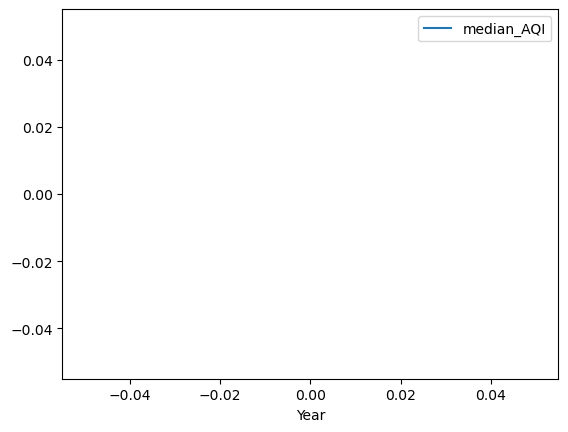

In [168]:
# show california data through the years
cal_vis = group_by_state.loc[group_by_state.State=="CA",["median_AQI","Year"]]
cal_vis.plot(x="Year", y="median_AQI", kind="line")

<AxesSubplot:xlabel='Year'>

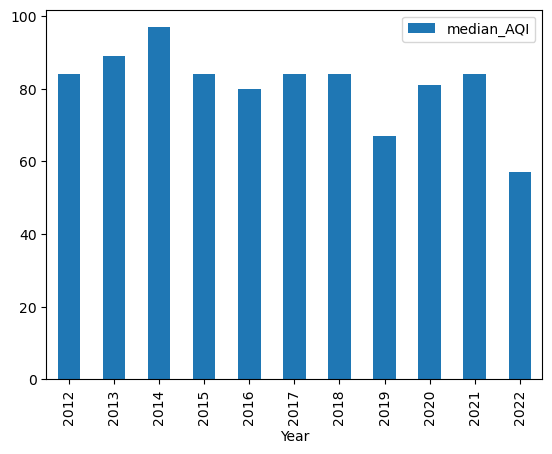

In [118]:
# practice visualization
df = renamed_data.loc[renamed_data.CBSA=="Bakersfield, CA",["median_AQI","Year"]]
df.plot(x="Year", y="median_AQI", kind="bar")

In [94]:
# Top 6 polluted states: AZ, CA, GA, MT, HI, CO
# identify target
target = ["median_AQI"]

In [107]:
# convert the target columns to "low_risk", "high_risk"
x = dict.fromkeys(['good_days','moderate_days'], 'low_pollution')   
renamed_data = renamed_data.replace(x)

x = dict.fromkeys(['unhealthy_sensitive_days', 'unhealthy_days', 'very_unhealthy_days', 'hazardous_days'], 'high_pollution')    
renamed_data = renamed_data.replace(x)

renamed_data.reset_index(inplace=True, drop=True)
renamed_data.head()

,Unnamed: 0,CBSA,cbsa_code,Year,days_with_AQI,good_days,moderate_days,unhealthy_sensitive_days,unhealthy_days,very_unhealthy_days,...,max_AQI,90th_percentile_AQI,median_AQI,days_CO,days_NO2,days_ozone,days_PM2.5,Days PM10,City,State
0,30,"Bakersfield, CA",12540,2012,366,64,160,92,49,1,...,202,154,84,0,0,218,143,5,Bakersfield,CA
1,46,"Bishop, CA",13860,2012,366,204,133,15,4,2,...,3812,93,48,0,0,280,10,76,Bishop,CA
2,88,"Chico, CA",17020,2012,366,170,165,23,8,0,...,186,97,53,0,0,230,136,0,Chico,CA
3,93,"Clearlake, CA",17340,2012,362,336,23,3,0,0,...,143,47,35,0,0,360,2,0,Clearlake,CA
4,110,"Crescent City, CA",18860,2012,119,119,0,0,0,0,...,45,26,10,0,0,0,79,40,Crescent City,CA


In [96]:
# Split data into training and testing
# create features
X = renamed_data.drop(columns='median_AQI')
X = pd.get_dummies(renamed_data.drop(columns='median_AQI'))
# create target
y = renamed_data['median_AQI']

In [97]:
# view status
X.describe()

,Unnamed: 0,cbsa_code,Year,days_with_AQI,good_days,moderate_days,unhealthy_sensitive_days,unhealthy_days,very_unhealthy_days,hazardous_days,...,City_Visalia-Porterville,City_Warner Robins,City_Yuba City,City_Yuma,State_ AZ,State_ CA,State_ CO,State_ GA,State_ HI,State_ MT
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,...,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,272.633296,31210.506187,2016.967379,332.493813,215.422947,98.103487,14.483690,3.749156,0.542182,0.192351,...,0.012373,0.012373,0.012373,0.012373,0.123735,0.418448,0.148481,0.173228,0.049494,0.086614
std,154.306617,11826.671714,3.153729,69.794423,88.628177,69.238656,24.487495,9.461340,3.884403,1.083303,...,0.110608,0.110608,0.110608,0.110608,0.329464,0.493582,0.355777,0.378658,0.217019,0.281427
min,5.000000,10500.000000,2012.000000,15.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,131.000000,20420.000000,2014.000000,349.000000,156.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,285.000000,31460.000000,2017.000000,365.000000,230.000000,94.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,411.000000,42020.000000,2020.000000,365.000000,280.000000,148.000000,16.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,524.000000,49740.000000,2022.000000,366.000000,365.000000,339.000000,120.000000,72.000000,74.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
X

,Unnamed: 0,cbsa_code,Year,days_with_AQI,good_days,moderate_days,unhealthy_sensitive_days,unhealthy_days,very_unhealthy_days,hazardous_days,...,City_Visalia-Porterville,City_Warner Robins,City_Yuba City,City_Yuma,State_ AZ,State_ CA,State_ CO,State_ GA,State_ HI,State_ MT
0,30,12540,2012,366,64,160,92,49,1,0,...,0,0,0,0,0,1,0,0,0,0
1,46,13860,2012,366,204,133,15,4,2,8,...,0,0,0,0,0,1,0,0,0,0
2,88,17020,2012,366,170,165,23,8,0,0,...,0,0,0,0,0,1,0,0,0,0
3,93,17340,2012,362,336,23,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,110,18860,2012,119,119,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,383,40660,2022,236,213,23,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
885,403,42340,2022,273,229,44,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
886,437,44900,2022,214,205,9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
887,459,46660,2022,232,178,54,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
# check balance of target values
y.value_counts()

44     67
48     41
45     41
47     39
43     38
       ..
87      1
100     1
83      1
119     1
123     1
Name: median_AQI, Length: 79, dtype: int64

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Columns: 189 entries, Unnamed: 0 to State_ MT
dtypes: int64(17), uint8(172)
memory usage: 267.5 KB


In [101]:
# Assign features and target to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(666, 189)

In [102]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brfc_model = BalancedRandomForestClassifier(n_estimators =100, random_state=1)
brfc_model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [103]:
from sklearn.metrics import balanced_accuracy_score
y_pred = brfc_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.06525242434333343

In [104]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [14]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

In [15]:
# List the features sorted in descending order by feature importance
priority_features = pd.Series(data=brfc_model.feature_importances_,index=X.columns)
priority_features.sort_values(ascending=False,inplace=True)
print(priority_features)

In [170]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [171]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.03326681735772645

In [172]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [173]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

         10       0.00      0.00      1.00      0.00      0.00      0.00         1
         11       0.00      0.00      1.00      0.00      0.00      0.00         1
         12       0.00      0.00      1.00      0.00      0.00      0.00         1
         13       0.00      0.00      1.00      0.00      0.00      0.00         3
         15       0.12      0.25      0.97      0.17      0.49      0.22         4
         16       0.00      0.00      1.00      0.00      0.00      0.00         2
         18       0.00      0.00      1.00      0.00      0.00      0.00         4
         19       0.00      0.00      1.00      0.00      0.00      0.00         1
         20       0.00      0.00      1.00      0.00      0.00      0.00         1
         21       0.00      0.00      1.00      0.00      0.00      0.00         1
         22       0.00      0.00      1.00      0.00      0.00      0.00         2
   